<h1>Student Performance in math<n>


## Objectives

## This report mainly explores the relationship between students' mathematics performance and their parents' occupations and education levels.<n>
##### The source of the dataset: https://archive.ics.uci.edu/dataset/320/student+performance


## Pseudocode

import all the required modules

read csv and save as dataframe

drop all the rows with na values

plot pie chart of parents' job

plot bar chart of Average Grades (G1, G2, G3) by Parents' Job

plot the heatmap of The parents' education level correlation with G1, G2, G3

Ordinary Least Squares

## Import Modules

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind

## Load Data

In [38]:
df = pd.read_csv("student-mat.csv", delimiter=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## The percentage of the parents' job

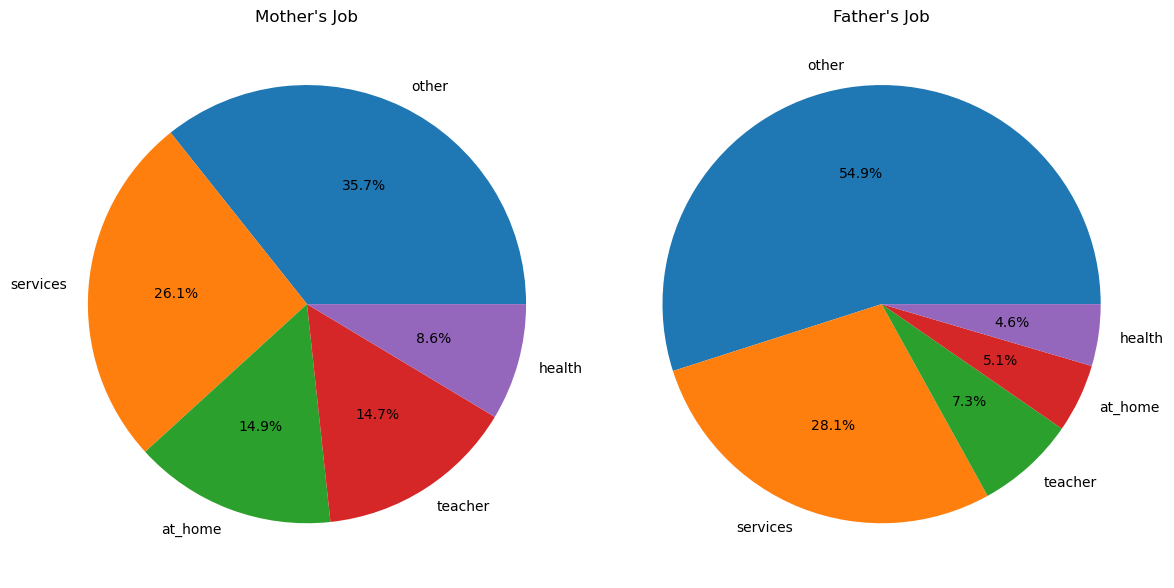

In [45]:
Z_MJ = df["Mjob"].value_counts()
labels_M = Z_MJ.index.values

Z_FJ = df["Fjob"].value_counts()
labels_F = Z_FJ.index.values

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# pie chart of mothers' job
axes[0].pie(Z_MJ, labels=labels_M, autopct='%1.1f%%')
axes[0].set_title("Mother's Job")

# pie chart of fathers' job
axes[1].pie(Z_FJ, labels=labels_F, autopct='%1.1f%%')
axes[1].set_title("Father's Job")

plt.tight_layout()
plt.show()

## Average Grades (G1, G2, G3) by Parents' Job

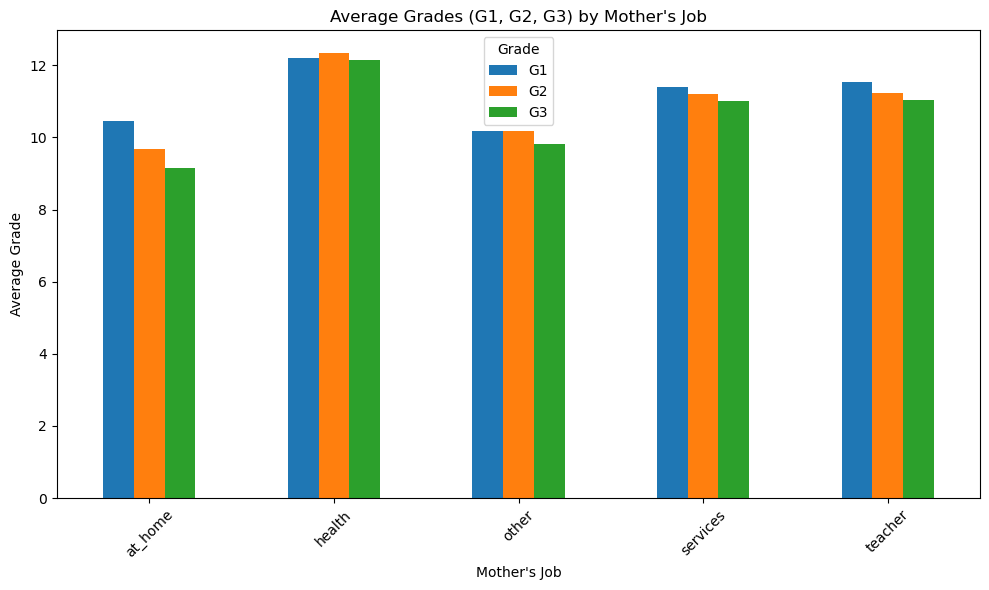

In [15]:
mean_scores_by_mjob = df.groupby('Mjob')[['G1', 'G2', 'G3']].mean()

# bar chart
mean_scores_by_mjob.plot(kind='bar', figsize=(10, 6))
plt.title("Average Grades (G1, G2, G3) by Mother's Job")
plt.xlabel("Mother's Job")
plt.ylabel("Average Grade")
plt.xticks(rotation=45)
plt.legend(title='Grade')
plt.tight_layout()
plt.show()

### By the above bar chart, students whose mothers work in the health sector consistently achieve higher math grades across the first, second, and final grading periods.

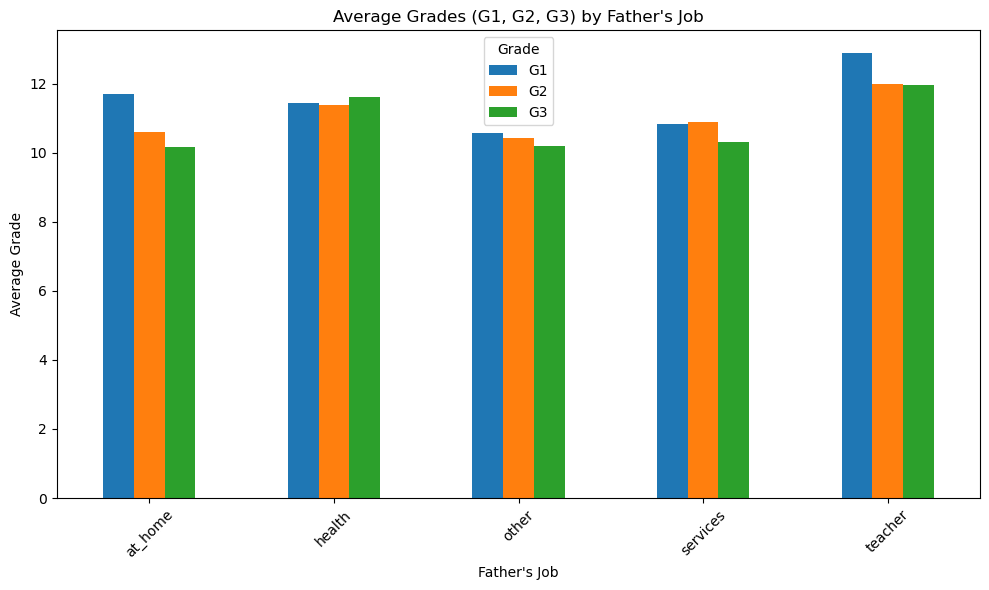

In [14]:
mean_scores_by_fjob = df.groupby('Fjob')[['G1', 'G2', 'G3']].mean()

# bar chart
mean_scores_by_fjob.plot(kind='bar', figsize=(10, 6))
plt.title("Average Grades (G1, G2, G3) by Father's Job")
plt.xlabel("Father's Job")
plt.ylabel("Average Grade")
plt.xticks(rotation=45)
plt.legend(title='Grade')
plt.tight_layout()
plt.show()

### Students whose fathers are teachers consistently perform better in math across the first, second, and final grading periods.

## The parents' education level correlation with G1, G2, G3

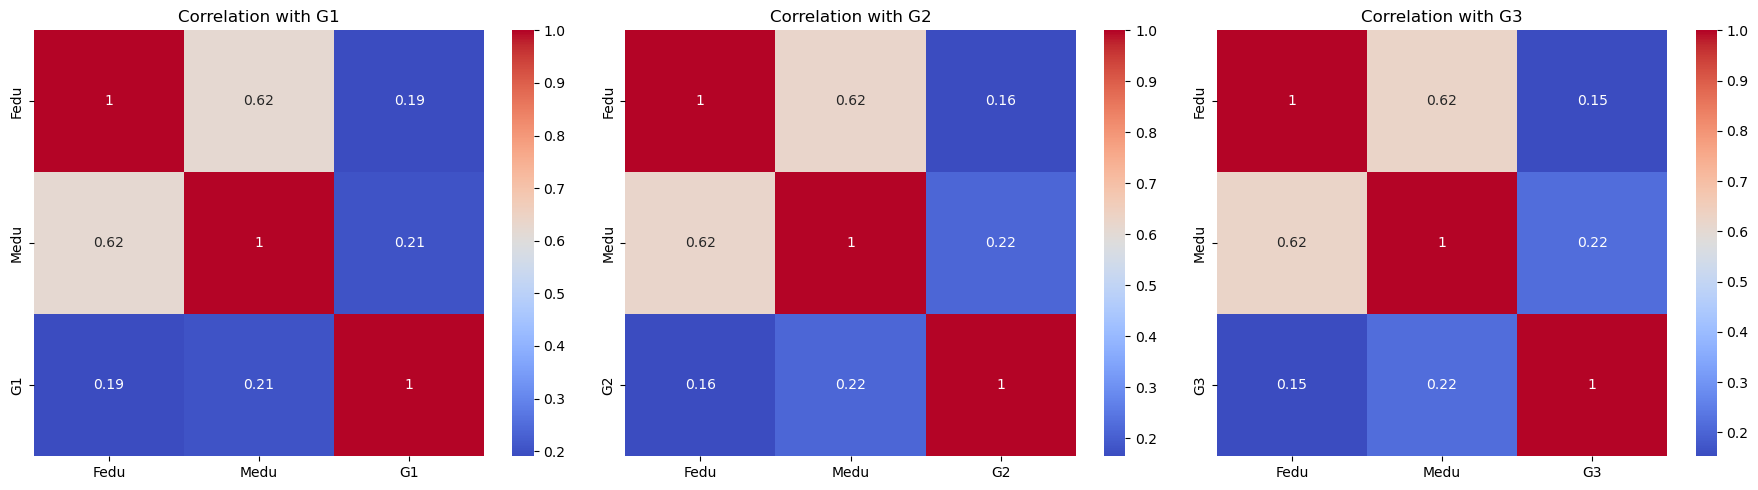

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# G1 heatmap
corr1 = df[['Fedu', 'Medu', 'G1']].corr()
sns.heatmap(corr1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title("Correlation with G1")

# G2 heatmap
corr2 = df[['Fedu', 'Medu', 'G2']].corr()
sns.heatmap(corr2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title("Correlation with G2")

# G3 heatmap
corr3 = df[['Fedu', 'Medu', 'G3']].corr()
sns.heatmap(corr3, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title("Correlation with G3")

plt.tight_layout()
plt.show()

### Notably, there is a strong positive correlation between the mother's and father's education levels. However, Parents' education levels show a weak positive correlation with students' academic performance. 

## From th perspect of Ordinary Least Squares (OLS) regression

In [9]:
X = df[['Fedu', 'Medu']]
y = df['G1']
X = sm.add_constant(X)  # 加上常數項
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     9.991
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           5.86e-05
Time:                        10:40:40   Log-Likelihood:                -1024.1
No. Observations:                 395   AIC:                             2054.
Df Residuals:                     392   BIC:                             2066.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9432      0.469     19.065      0.0

### Only mother's education (Medu) is a statistically significant predictor of first period grades (G1).<n>
### The model overall is statistically significant but explains only a small portion of the variation in grades.<n>
### Father's education (Fedu) shows a positive but not significant effect.